# NATURAL LANGUAGE PROCESSING


# Sentiment Analysis using:

### 1. Valence Aware Dictionary and sEntiment Reasoner (VADER)

### 2. Roberta Pretrained Model from 🤗


In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading Data
df = pd.read_csv("Reviews.csv")
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
99994,99995,B000LQORDE,AL22WN8RBBOW7,"LifeInTheCity ""trogg""",2,5,5,1256428800,Good Stuff,I love these noodle. A little to spicy for th...
99995,99996,B000LQORDE,A2P7HIRYYWVOBD,Mason,2,5,5,1254096000,yummy!,I just love it and will buy another box when I...
99996,99997,B000LQORDE,A1K0ZH5MQFBA77,jennilight,2,5,4,1250985600,Tastes like More!,My late father in law used to have a rating sy...
99997,99998,B000LQORDE,A29FRN2O7LWINL,T. Tsai,2,5,5,1237766400,Great ramen,This is my favorite brand of Korean ramen. It ...


In [3]:
# Total number of Rows & Columns
print(df.shape)
df = df.head(5000)   
df.shape

(99999, 10)


(5000, 10)

## EDA

In [4]:
# Importing Libraries for Visualization
import matplotlib.pyplot as plt
plt.style.use('ggplot')

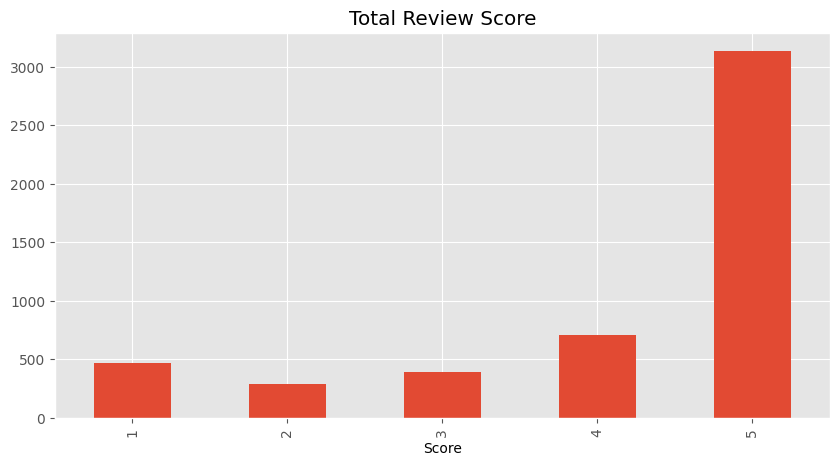

In [5]:
# Visualizing Review Score
vz = df['Score'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Total Review Score',
          figsize=(10, 5))
vz.set_xlabel('Score')
plt.show()

## 1. Valence Aware Dictionary and sEntiment Reasoner (VADER) 

### We will use NLTK's SentimentIntensityAnalyzer to get the  POSITIVE / NEUTRAL / NEGATIVE scores of the text

###  Approach: "Bag of Words"


In [6]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [7]:
# Checking Polarity Score
sia.polarity_scores('This is good')

{'neg': 0.0, 'neu': 0.408, 'pos': 0.592, 'compound': 0.4404}

In [8]:
sia.polarity_scores('This is worst')

{'neg': 0.672, 'neu': 0.328, 'pos': 0.0, 'compound': -0.6249}

In [9]:
sia.polarity_scores('This is fine')

{'neg': 0.0, 'neu': 0.526, 'pos': 0.474, 'compound': 0.2023}

### Polarity Score of the Dataset

In [10]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/5000 [00:00<?, ?it/s]

In [11]:
# Vader Model Sentiment Score 
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, how='left')
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


## Plotting VADER Results

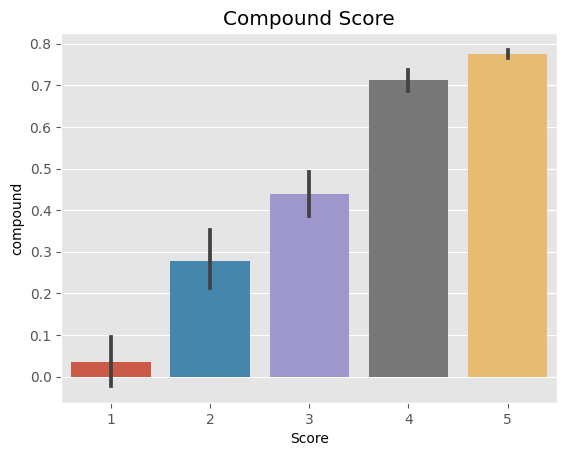

In [12]:
import seaborn as sns

vs = sns.barplot(data=vaders, x='Score', y='compound')
vs.set_title('Compound Score')
plt.show()

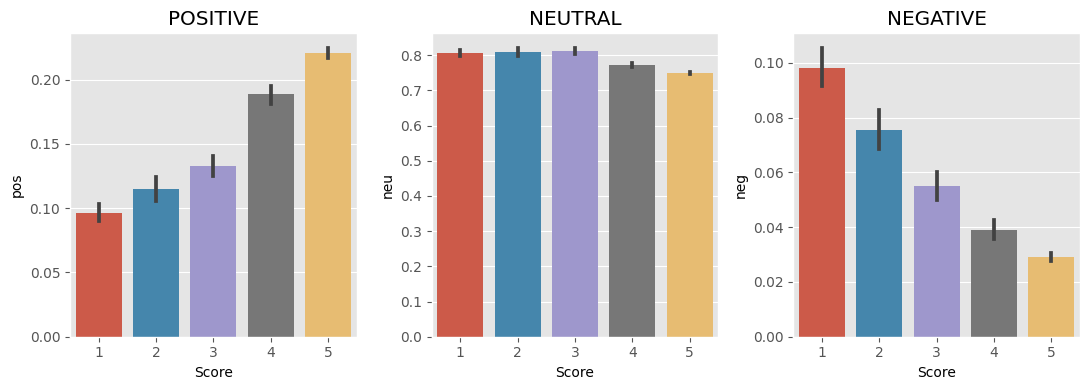

In [13]:
# Plotting seperate bar plot for Positive, Neutral & Negative
fig, vs1 = plt.subplots(1, 3, figsize=(11, 4))
sns.barplot(data=vaders, x='Score', y='pos', ax=vs1[0])
sns.barplot(data=vaders, x='Score', y='neu', ax=vs1[1])
sns.barplot(data=vaders, x='Score', y='neg', ax=vs1[2])
vs1[0].set_title('POSITIVE')
vs1[1].set_title('NEUTRAL')
vs1[2].set_title('NEGATIVE')
plt.tight_layout()
plt.show()

# 2.  Roberta Pretrained Model

In [14]:
# Automatically converts raw text input into the appropriate format for the model 
from transformers import AutoTokenizer
# Automatically selects the appropriate pre-trained model for a sequence classification task
from transformers import AutoModelForSequenceClassification
# Convert a vector of real numbers into a probability distribution.
from scipy.special import softmax

In [15]:
# importing a Pretrained model for sentiment analysis from 🤗 models hub
Model = f"cardiffnlp/twitter-roberta-base-sentiment"
token = AutoTokenizer.from_pretrained(Model)
mod = AutoModelForSequenceClassification.from_pretrained(Model)

In [16]:
# VADER Model analysis
ex = (df['Text'][99])
print(ex)
# checking Polarity Score
sia.polarity_scores(ex)

I fed this to my Golden Retriever and he hated it.  He wouldn't eat it, and when he did, it gave him terrible diarrhea.  We will not be buying this again.  It's also super expensive.


{'neg': 0.173, 'neu': 0.735, 'pos': 0.092, 'compound': -0.5267}

In [17]:
# Roberta Model Analysis
encod_text = token(ex, return_tensors='pt')
output = mod(**encod_text)
scores = output[0][0].detach()
scores = softmax(scores)
scores_dict = {
    'Roberta_Neg' : scores[0],
    'Roberta_Neu' : scores[1],
    'Roberta_Pos' : scores[2]
}
print(ex)
print(scores_dict)

I fed this to my Golden Retriever and he hated it.  He wouldn't eat it, and when he did, it gave him terrible diarrhea.  We will not be buying this again.  It's also super expensive.
{'Roberta_Neg': 0.96244246, 'Roberta_Neu': 0.031978756, 'Roberta_Pos': 0.0055787326}


In [18]:
# Analyzing Roberta pos,neg,neu values & inserting them score_dict
def polarity_score_roberta(ex):
    encod_text = token(ex, return_tensors='pt')
    output = mod(**encod_text)
    scores = output[0][0].detach()
    scores = softmax(scores)
    scores_dict = {
        'Roberta_Neg' : scores[0],
        'Roberta_Neu' : scores[1],
        'Roberta_Pos' : scores[2]
    }
    return scores_dict

## Combining Models

In [19]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Text']
        myid = row['Id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"Vader_{key}"] = value
        roberta_result = polarity_score_roberta(text)
        comb_mod = {**vader_result_rename, **roberta_result} 
        res[myid] = comb_mod
# Some Ids contains Text whose size is too big for the model to handle, so we will skip these Ids.         
    except RuntimeError:           
        print(f'Error in Id {myid}')  # Skipped Ids

  0%|          | 0/5000 [00:00<?, ?it/s]

Error in Id 83
Error in Id 187
Error in Id 529
Error in Id 540
Error in Id 746
Error in Id 863
Error in Id 1053
Error in Id 1070
Error in Id 1156
Error in Id 1321
Error in Id 1375
Error in Id 1498
Error in Id 1575
Error in Id 1796
Error in Id 1826
Error in Id 2169
Error in Id 2248
Error in Id 2476
Error in Id 2492
Error in Id 2584
Error in Id 2610
Error in Id 2897
Error in Id 2898
Error in Id 2902
Error in Id 2928
Error in Id 2942
Error in Id 2944
Error in Id 2947
Error in Id 2948
Error in Id 3022
Error in Id 3023
Error in Id 3025
Error in Id 3306
Error in Id 3788
Error in Id 3969
Error in Id 4107
Error in Id 4110
Error in Id 4307
Error in Id 4316
Error in Id 4408
Error in Id 4483
Error in Id 4512
Error in Id 4553
Error in Id 4583


In [20]:
# Adding Vader & Roberta pos,neg,neu value columns in df 
df_result = pd.DataFrame(res).T
df_result = df_result.reset_index().rename(columns={'index': 'Id'})
df_result = df_result.merge(df, how='left')
df_result.head()

,Id,Vader_neg,Vader_neu,Vader_pos,Vader_compound,Roberta_Neg,Roberta_Neu,Roberta_Pos,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,0.009624,0.049980,0.940395,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,0.508986,0.452414,0.038600,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,0.003229,0.098067,0.898704,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,0.002295,0.090219,0.907486,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,0.001635,0.010302,0.988063,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


# Comparing Models

In [21]:
df_result.columns

Index(['Id', 'Vader_neg', 'Vader_neu', 'Vader_pos', 'Vader_compound',
       'Roberta_Neg', 'Roberta_Neu', 'Roberta_Pos', 'ProductId', 'UserId',
       'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator',
       'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

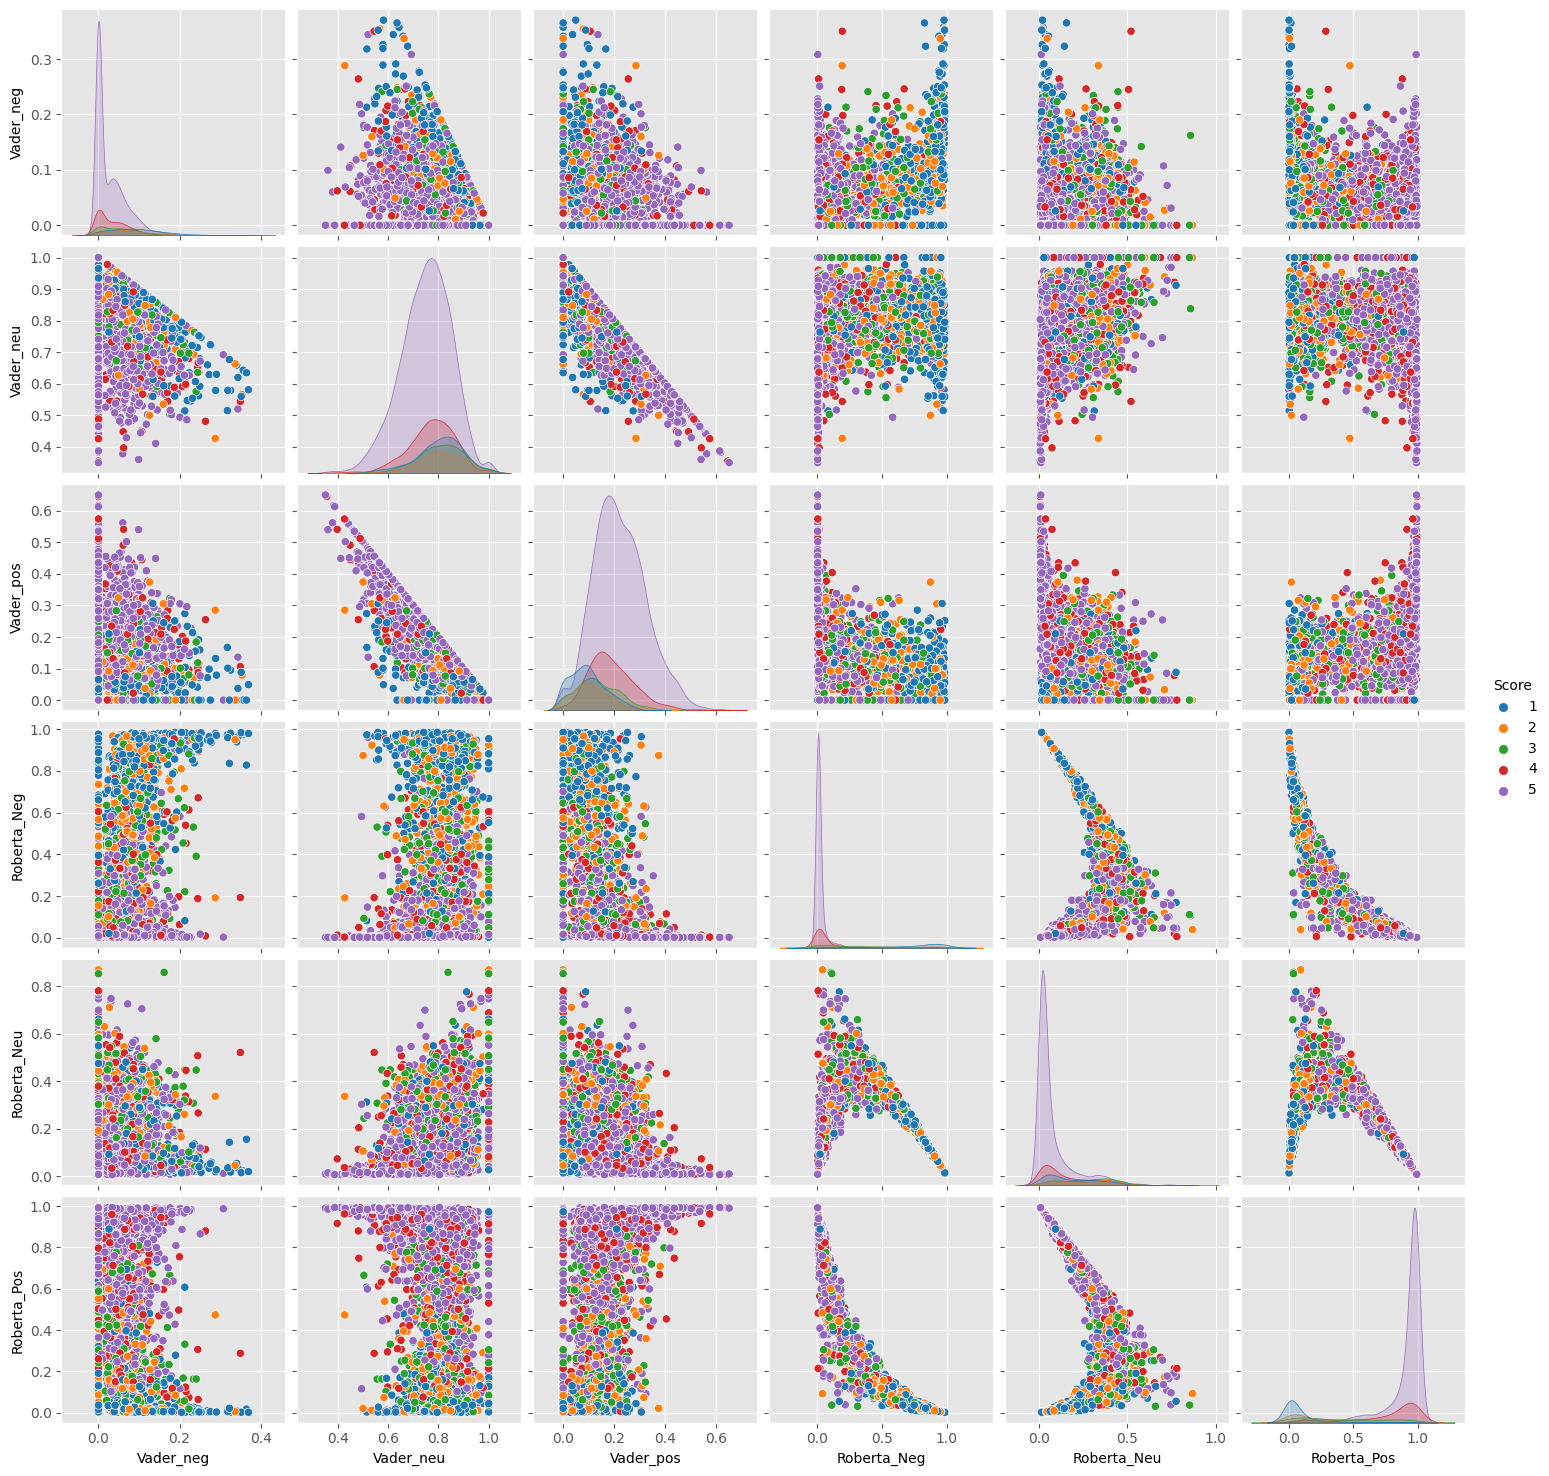

In [22]:
# Comparing Vader & Roberta models by Visualizing
sns.pairplot(data=df_result,
             vars=['Vader_neg', 'Vader_neu', 'Vader_pos', 
                   'Roberta_Neg', 'Roberta_Neu', 'Roberta_Pos'], 
             hue='Score', 
             palette='tab10')
plt.show()

# 3.  Analyzing Both Models 

### Checking the analysis of both models 

## Vader Model  

### 5 Rating

In [23]:
df_result.query('Score==5').sort_values('Vader_pos', ascending=False)['Text'].values[0]

'Super tasty, super delicious. Best tea ever, sweet and cinnamony. I actually like these better than the individually wrapped tea bags.'

In [24]:
df_result.query('Score==5').sort_values('Vader_neg', ascending=False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

In [25]:
df_result.query('Score==5').sort_values('Vader_neu', ascending=False)['Text'].values[0]

'i bought this -4 pack of dove deep wash and three months later i am still using it.<br />i dont think i could use any other product.'

### 1 Rating

In [26]:
df_result.query('Score==1').sort_values('Vader_pos', ascending=False)['Text'].values[0]

"Second ingredient is SUGAR! Need I say more? Make your own bisquit mix, it's super easy!"

In [27]:
df_result.query('Score==1').sort_values('Vader_neg', ascending=False)['Text'].values[0]

'This does not taste like cocoa it is very weak no matter what cup size you use.I is just not good.'

In [28]:
df_result.query('Score==1').sort_values('Vader_neu', ascending=False)['Text'].values[0]

'purchased and it came looking new, as i had bought it NEW, but it was actually damaged.<br />customer service with the actual company is awful--as i needed to contact the company itself to return it.'

## Roberta Model

### 5 Rating

In [29]:
df_result.query('Score==5').sort_values('Roberta_Pos', ascending=False)['Text'].values[0]

"This is my son's favorite dinner! Best of all it seems it has the best combo of protein (21%) , vitamin A (100%) and C (30%). It is runnier than most of their dinners which was a great start for solids with protein in it. Love love love this brand and flavor. I think I purchased 50 jars so far."

In [30]:
df_result.query('Score==5').sort_values('Roberta_Neg', ascending=False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

In [31]:
df_result.query('Score==5').sort_values('Roberta_Neu', ascending=False)['Text'].values[0]

'Product received is as advertised.<br /><br /><a href="http://www.amazon.com/gp/product/B001GVISJM">Twizzlers, Strawberry, 16-Ounce Bags (Pack of 6)</a>'

### 1 Rating

In [32]:
df_result.query('Score==1').sort_values('Roberta_Pos', ascending=False)['Text'].values[0]

'Bisquick GF is easy to use. Pancakes and muffins are very<br />tasty. The product is quick and easy to use. It makes my day.  Gram'

In [33]:
df_result.query('Score==1').sort_values('Roberta_Neg', ascending=False)['Text'].values[0]

"Arrives $15.06 postage due in a used Friendly 's box. UNFRIENDLY don't you think? Worst service ever!!!!!_Totally unfriendly! !!!aweful aweful aweful service!"

In [34]:
df_result.query('Score==1').sort_values('Roberta_Neu', ascending=False)['Text'].values[0]

'INGREDIENTS: SUGAR, GLUCOSE SYRUP SOLIDS, COCA (PROCESSED WITH ALKALI), PARTIALLY HYDROGENATED VEGETABLE OIL (MAY CONTAIN COCONUT, SOYBEAN, SUNFLOWER, PALM AND/OR CANOLA), NONFAT DRY MILK, MODIFIED WHEY, MALTODEXTRIN, SALT, NATURAL AND ARTIFICIAL FLAVORS, CELLULOSE GUM, SODIUM CASEINATE, CORNSTARCH, LACTOSE, DIPOTASSIUM PHOSPHATE, SUCRALOSE, MONO- AND DIGLYCERIDES, SILICON DIOXIDE, SOY LECITHIN, ARTIFICIAL COLOR.<br />CONTAINS: MILK AND SOY<br /><br />People, please read labels....'

# Sentiment Analysis using 🤗 

## Transformer  Pipeline

In [35]:
# Transformer Pipeline provieds APIs to access and use state-of-the-art pre-trained models.
from transformers import pipeline
sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [36]:
sent_pipeline('love this product')

[{'label': 'POSITIVE', 'score': 0.9998754262924194}]

In [37]:
sent_pipeline('Worst product')

[{'label': 'NEGATIVE', 'score': 0.9997625946998596}]